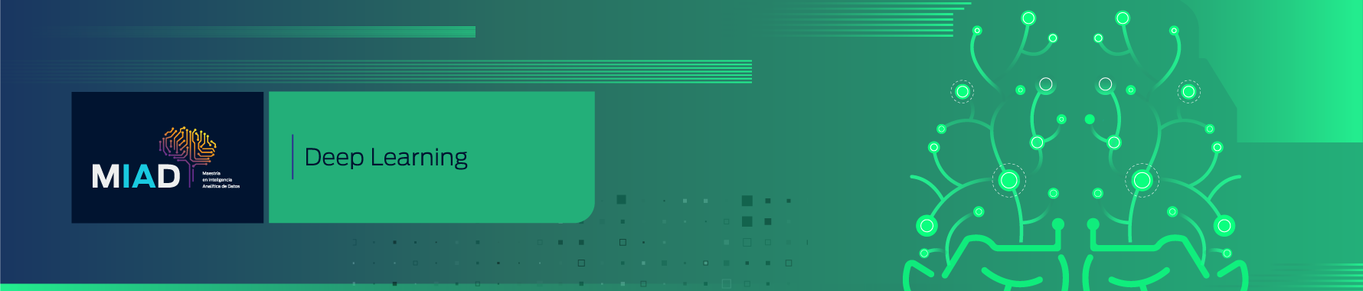

# Aplicaciones de Redes Convolucionales - Semana 6
##  Implementación y uso de VGG16 en Keras

### Propósito de la actividad
En esta actividad mostraremos cómo usar redes convolucionales para visión computacional que ya han sido pre-entrenadas con grandes cantidades de datos. En particular, usaremos la red VGG16 que ha sido entrenada con los datos de: "ImageNet Large Scale Visual Recognition Challenge (ILSVRC)", los cuales contienen 1000 clases diferentes de reconocimientos de objetos en las imágenes y utiliza 1.281.167 imágenes para entrenamiento, 50.000 para validación, y 100.000 imágenes de _test_. Más información puedes ser encontrada en: https://www.image-net.org/download.php


### Instrucciones generales

1. Para realizar la actividad solo siga las indicaciones asociadas a cada celda del notebook. Sin embargo, siéntase libre de modificar el archivo editando las celdas, lo que le permitirá afianzar su comprensión sobre las distintas funcionalidades de código.  

2. Recuerde que para esta actividad NO necesita realizar ningún tipo de entrega.

### Librerías a importar

A continuación se muestran los comandos a ejecutar para poder implementar los procedimientos de este notebook:

In [1]:
import numpy as np
#Las siguientes dos líneas evitan la generación de "warnings" y "flags" al importar keras y tensorflow.
#Dichas advertencias no comprometen el funcionamiento del código.
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
#Importación de keras y tensorflow
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.models import Sequential

### Importar modelo con los pesos ya entrenados

La estructura de modelo secuencial tipo CNN, puede ser importada directamente sin necesidad de definir cada una de las capas, como conv2D, MaxPooling, etc. Para esto, usamos la función VGG16.

Dentro de los argumentos, es posible usar `weights='imagenet'`, que incluye los valores de todos los parámetros ya entrenados con los datos descritos del ILSVRC. Además, está el parámetro `include_top`, que hace referencia a si se incluyen las últimas 3 capas de tipo completamente conectadas (_fully connected_). En nuestro caso, como el proósito es usar este modelo directamente para predecir imágenes, podemos incluir estas capas y predecir sobre una de las 1000 categorías en consideración. En algunas ocasiones, como por ejemplo cuando se hace _transfer learning_, no se incluyen estas últimas capas y se hace un modelo que corresponda a la salida particular del problema.

In [2]:
#Importar modelo entrenado VGG16 con las últimas capas
#Puede tomas algunos minutos
vgg = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=True)
vgg.summary()

553467096/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

### Predicciones sobre algunas imágenes de prueba

Ahora usaremos unas imágenes de prueba para ver cómo predice la red VGG16. Note que la imagen se reescala a $224\times 224$ pixeles, como lo requiere la red a utilizar:

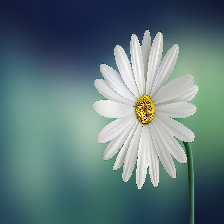

In [3]:
#Se carga la imagen y se establece el tamaño objetivo en 224 x 224 pixeles
img = load_img('flor.jpg', target_size=(224,224))
img

In [4]:
from keras.utils import img_to_array

# Se convierte la imagen a un arreglo de numpy
img = img_to_array(img)
img.shape

(224, 224, 3)

La imagen posee tres canales correspondientes a los 3 colores RGB. A continuación, se realiza el preprocesamiento de la imagen y se hace la predicción utilizando VGG16:

In [5]:
# reshape data for the model
img= img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
# prepare the image for the VGG model
img = preprocess_input(img)
# predict the probability across all output classes
yhat = vgg.predict(img)
from keras.applications.vgg16 import decode_predictions
label = decode_predictions(yhat)
label

35363/35363 [==============================] - 0s 0us/step


[[('n11939491', 'daisy', 0.9838684),
  ('n02219486', 'ant', 0.0010576467),
  ('n03930313', 'picket_fence', 0.0010205699),
  ('n04286575', 'spotlight', 0.0009920276),
  ('n04456115', 'torch', 0.0009854526)]]

In [6]:
label[0][0]

('n11939491', 'daisy', 0.9838684)

En efecto, se reconoció la flor margarita (`daisy`). Ahora usaremos otra imagen de prueba:

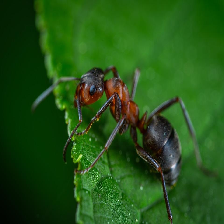

In [7]:
img2 = load_img('flor2.jpg', target_size=(224,224))
img2

In [8]:
img2 = img_to_array(img2)
img2 = img2.reshape((1, img2.shape[0], img2.shape[1], img2.shape[2]))
img2 = preprocess_input(img2)
yhat2 = vgg.predict(img2)
label2 = decode_predictions(yhat2)
label2[0][0]

1/1 [==============================] - 0s 364ms/step


('n02219486', 'ant', 0.98920655)

#### Ejercicio propuesto no calificado: 

Ahora busque la imagen de un perro, puede ser una fotografía que usted haya tomado o una que encuentre disponible en Internet. Repita el procedimiento para verificar si el modelo puede predecir el contenido de la imagen.

### Otras Redes pre-entrenadas en Keras

Además de VGG16, existen otras redes convolucionales para visión computacional para las cuales es posible obtener la arquitectura ya establecida, y para algunas de ellas, se pueden obtener los pesos de la red pre-entrenada. Acá puede encontrar información adicional: [keras.io/api/applications/](keras.io/api/applications/)